In [2]:
#1

# Prerequisites

# Load modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Show plots in the notebook
%matplotlib inline

# Read earthquakes data
import pandas as pd
earthquakes_data =  pd.read_csv('usgs_earthquakes.csv')


In [3]:
earthquakes_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [4]:
#提取出用到的绘图数据
ds=earthquakes_data.loc[:,['time','latitude','longitude','mag']]
ds

,time,latitude,longitude,mag
0,2014-01-31 23:53:37.000,60.252000,-152.708100,1.10
1,2014-01-31 23:48:35.452,37.070300,-115.130900,1.33
2,2014-01-31 23:47:24.000,64.671700,-149.252800,1.30
3,2014-01-31 23:30:54.000,63.188700,-148.957500,0.80
4,2014-01-31 23:30:52.210,32.616833,-115.692500,1.34
...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,3.80
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,2.40
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,0.43
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,0.40


In [5]:
#按照mag排序后，选择前50的数据并重新排序
ds_top50=ds.sort_values('mag',ascending=False).iloc[0:50].reset_index(drop=True)
ds_top50



,time,latitude,longitude,mag
0,2014-04-01 23:46:47.260,-19.6097,-70.7691,8.2
1,2014-06-23 20:53:09.700,51.8486,178.7352,7.9
2,2014-04-03 02:43:13.110,-20.5709,-70.4931,7.7
3,2014-04-12 20:14:39.300,-11.2701,162.1481,7.6
4,2014-04-19 13:28:00.810,-6.7547,155.0241,7.5
5,2014-04-13 12:36:19.230,-11.4633,162.0511,7.4
6,2014-10-14 03:51:34.460,12.5262,-88.1225,7.3
7,2014-04-18 14:27:24.920,17.3970,-100.9723,7.2
8,2014-04-11 07:07:23.130,-6.5858,155.0485,7.1
9,2014-11-15 02:31:41.720,1.8929,126.5217,7.1


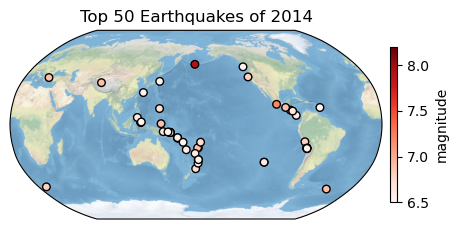

In [18]:

#建立经纬度和震级的列表
lons=[]
lats=[]
mags=[]
for i in ds_top50['latitude']:
    lats.append(i)
for i in ds_top50['longitude']:
    lons.append(i)
for i in ds_top50['mag']:
    mags.append(i)    

#提取震级的最大值和最小值
max_mag = ds_top50['mag'][0] 
min_mag = ds_top50['mag'][49]

#建立绘图面板
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

#确定投影的类型
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()

#绘图
ax.scatter(lons,lats,c=mags ,transform=ccrs.PlateCarree(),vmin= min_mag, vmax= max_mag , cmap='Reds',
           marker='o',edgecolors='black',s=30, linewidths=1)
#绘制颜色标签
cb=ax.figure.colorbar(ax.collections[0],fraction=0.02, pad=0.02,label = 'magnitude') 
#标题
ax.set_title('Top 50 Earthquakes of 2014')
plt.show()

#参照这些网站
#https://blog.csdn.net/weixin_42969619/article/details/99672134
#https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/global_map.html#sphx-glr-gallery-lines-and-polygons-global-map-py

In [19]:
#2.1


# 打开文件
#采用第三次作业中第一题使用的数据
ds= xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

Text(0.5, 1.0, 'The average temperature of the global sea in 1960 to 2016 year')

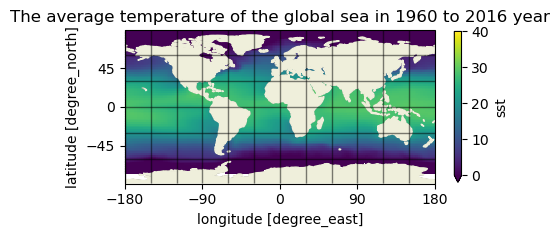

In [20]:
#建立绘图面板
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

#确定投影的类型
ax = plt.axes(projection=ccrs.PlateCarree())
ax.tick_params(labelsize=10)
ax.set_xticks(np.linspace(-180, 180, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 5), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                       name='admin_0_countries',
                                       scale='110m',
                                       facecolor='none',
                                       edgecolor='black',
                                       linewidth=0.5))
# ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
# ax.stock_img()
# Draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

#计算每个坐标的平均温度
surface_T = ds.sst.mean(dim='time')
surface_T

# Plot the surface temperature
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=40, cbar_kwargs={'shrink': 0.4})

ax.add_feature(cfeature.LAND, zorder=1)
plt.title("The average temperature of the global sea in 1960 to 2016 year")


Text(0.995, -0.13, 'The average of sea temperature around the Shenzhen in 1960 to 2016 year')

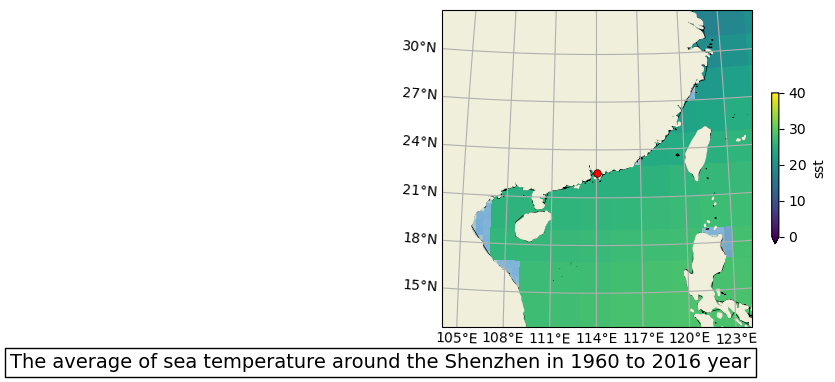

In [21]:
#2.2

# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# 选择深圳地域位置
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)



#绘制轮廓
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                       name='admin_0_countries',
                                       scale='110m',
                                       facecolor='none',
                                       edgecolor='black',
                                       linewidth=0.5))
ax.coastlines(resolution='10m', linewidth=0.5)
ax.stock_img()


#标记出深圳的位置
ax.scatter(116.3,39.9,s=30,c='r',marker='o',zorder=5,edgecolors='k', linewidths=0.5)

#绘制网格和xy刻度
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#绘制海洋表面温度变化
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=40, cbar_kwargs={'shrink': 0.4})

#覆盖陆地
ax.add_feature(cfeature.LAND, zorder=1)

#标题
ax.text(0.995,
        -0.13,
        "The average of sea temperature around the Shenzhen in 1960 to 2016 year",
        horizontalalignment='right',
        transform=ax.transAxes,
        fontsize=14,
        bbox=dict(boxstyle='square, pad=0.25',
                  facecolor='white',
                  edgecolor='black'))

#参照网址
#https://geocat-examples.readthedocs.io/en/latest/gallery/Polygons/NCL_polyg_4.html#sphx-glr-gallery-polygons-ncl-polyg-4-py